In [1]:
import sys
sys.path.append("../")
import numpy as np
from scipy.fftpack import fftfreq
import os
import glob
import cv2
import csv
from utils import show_peak, VarianceFilter, FFTStrip,FFTSpaceStrip, doubleplot, doFilterFFT,tripleplot, VelocityStrip, watershed_image_hough,DiffVelocityStrip
import pandas as pd
from tifffile import imread, imwrite
from scipy.fftpack import fft
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects, binary_erosion

from scipy.signal import find_peaks
from skimage import data, io

from skimage.filters import threshold_otsu, threshold_mean
from skimage.filters import roberts, sobel, scharr, prewitt, gaussian
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError, AttributeError):
        from pathlib2 import Path

try:
        import tempfile
        tempfile.TemporaryDirectory
except (ImportError, AttributeError):
       from backports import tempfile

In [7]:
Kymo = '/home/sancere/Downloads/DistanceMethodCurvature_Dpachys_controlTrackID1.tif'
Embryo = '/home/sancere/Downloads/Dpachys_control.tif'
Csv = '/home/sancere/Downloads/Co-ordinatesETrack_Dpachys_controlCellID01.txt'
savedir = '/home/sancere/Downloads/'
Time_unit = 10
Xcalibration = 0.034
#Block size for averaged measurments
blocksize = 50
timeav = 30
# Skip the display points on the clock
displayskip = 2
#ignore the last few blocks 
ignorelast = 1
Path(savedir).mkdir(exist_ok = True)


In [3]:

AverageVelocity = []
Block = []
AverageFrequ = []
Frequency = []
ImageName = []
AnteriorList = []
PosteriorList = []

 
    
Kymoimage = imread(Kymo)
Embryoimage = imread(Embryo)
x, y, t, distance, perimeter, N, M = np.loadtxt(Csv, skiprows = 3, unpack=True)
Blockiter = int(len(x)/max(t))
print('Total Perimeter points on Kymo:', Blockiter)
Dictionary = []
for i in range(0, Blockiter):
    Dictionary.append([i, x[i], y[i]])



   



Total Perimeter points on Kymo: 2401


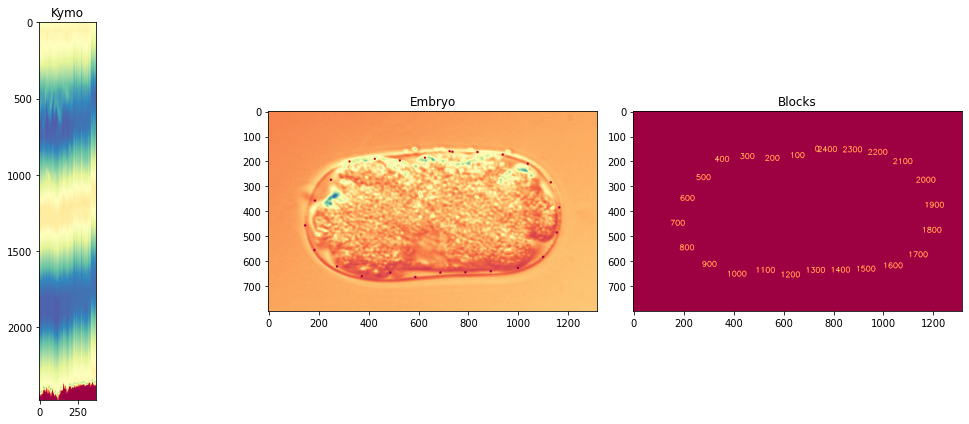

In [4]:
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (50, 50) 
# fontScale 
fontScale = 1
 
color = (255, 255, 0) 
thickness = 1
Clock = np.zeros([Embryoimage.shape[1], Embryoimage.shape[2]])
for i in range(0, Blockiter, 2 *blocksize):
    cv2.circle(Embryoimage[0,:], (int(x[i]), int(y[i])), 5,(255,0,0), thickness = -1 )
    cv2.putText(Clock, str(i), (int(x[i]), int(y[i])), font,  
                   fontScale, color, thickness, cv2.LINE_AA)
tripleplot(Kymoimage,Embryoimage[0,:], Clock, 'Kymo', 'Embryo', 'Blocks')

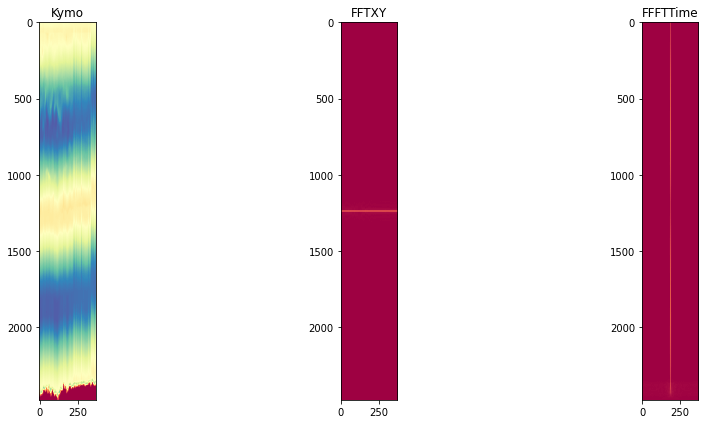

In [8]:
Name = os.path.basename(os.path.splitext(Kymo)[0])

#Get simple velocity
FFTSpaceImage = FFTSpaceStrip(Kymoimage)
FFTTimeImage = FFTStrip(Kymoimage)


imwrite((savedir + Name + 'FFTSpace' + '.tif' ) , FFTSpaceImage.astype('float32'))
imwrite((savedir + Name + 'FFTTime' + '.tif' ) , FFTTimeImage.astype('float32'))


tripleplot(Kymoimage,FFTSpaceImage, FFTTimeImage, 'Kymo', 'FFTXY', 'FFFTTime')
